In [23]:
import math as m
import matplotlib.pyplot as plt
import numpy as np

def th(s, ro, u, mu, momth, A):
    return s * 0.0575 * momth ** (-0.8) * (ro * u * s / mu) ** (-0.2) * A

def A (M, Tw_fact):
    return (1 + 0.15 * M ** 2) ** 0.6 / (1 + 0.375 * 0.3 * M ** 2) ** 1.05 * Tw_fact ** 0.6 * (2 / (1 + Tw_fact)) ** 1.05

def momth(z, M, Tw_fact):
    sum = 0
    for i in range(1,len(z)):
        sum += 7 / 2 * (z[i] - z[i - 1]) * (((z[i] ** 7 - z[i] ** 8) / ((1 + 0.15 * M ** 2) * ((1 - Tw_fact) * z[i] + Tw_fact) - 0.15 * M ** 2 * z[i] ** 2)) \
                                            + ((z[i - 1] ** 7 - z[i - 1] ** 8) / ((1 + 0.15 * M ** 2) * ((1 - Tw_fact) * z[i - 1] + Tw_fact) - 0.15 * M ** 2 * z[i - 1] ** 2)))
    return sum

def starT(T, M):
    return T * (1 + 0.72 ** (1 / 3) * 0.15 * M ** 2)
        
def mu(T):
    return 18.27e-6 * (411.15) / (T + 120) * (T / 291.15) ** (3 / 2)

def Tw_fact(T, M):
    global Tw
    return Tw / (T * (1 + (0.72) ** (1 / 3) * 0.15 * M ** 2))

def toMach(u, T, p, ro):
    #return u / m.sqrt(373.1 * T)#287*1.4 and not 1.3
    return u / m.sqrt(1.3 * p / ro)

def xni(th, momth, A, ro, u, mu):
    return (th / (0.0575 * momth ** (-0.8) * A) * (ro * u / mu) ** 0.2) ** (5 / 4)

def Rex(ro, u, xni, mu):
    return(ro * u * xni / mu)

def cf(Rex, momth, A):
    return 0.0922 * A * momth ** 0.2 / (Rex ** 0.2)

z = [float(i) / 100 for i in range(101)]
p_data = []
s = [0.0]
u = []
p = []
T = []
Tw = 900
ro = []
x = []
y = []
M = []
T_w =[]
delta = [0.0]
cap = 1.3
#R = 8.31 / 0.029
R = 287
cp = 36.01
M.append(1.01)#checkthisout
flag = True
p.append(14.8*98066.5 /(1 + 0.15 * M[0] ** 2) ** (1.3 / 0.3))
T.append(1650 / (1 + 0.15 * M[0] ** 2))
#u.append(m.sqrt(373.1 * T[0])*M[0])
ro.append(p[0] / (R * T[0]))
u.append(m.sqrt(1.3 * p[0]/ ro[0])*M[0])
#p.append(783124.6777770185)
#u.append(734.341047899402)
#T.append(1431.0308192000973)
#ro.append(1.9067775321445863)
print(p[0], u[0] , T[0], ro[0])
file = open("wall_int.txt")
for line in file:
    buf = line.split();
    if len(buf) > 1:
        x.append(float(buf[0]))
        y.append(float(buf[1]))       
file.close()        
file = open("p225_int.txt")
for line in file:
    buf = line.split();
    if len(buf) > 1:
        p_data.append(float(buf[1]) * 98066.5)
file.close()
file = open("t_int.txt")
for line in file:
    buf = line.split();
    if len(buf) > 1:
        T_w.append(float(buf[1]))       
file.close()  
for i in range(1, len(y)):
    buf = ((y[i] - y[i-1]) ** 2 + (x[i] - x[i - 1]) ** 2)**0.5
    s.append(s[i-1] + buf)
i = 1    
while x[i] <= 1.65:
    """{"""
    сur_mu = mu(T[i - 1])
    cur_Tw_fact = Tw_fact(T[i - 1], M[i - 1])
    cur_A = A(M[i - 1], cur_Tw_fact)
    cur_momth = momth(z, M[i - 1], cur_Tw_fact)
    cur_th = th(s[i], ro[i - 1], u[i - 1], сur_mu, cur_momth, cur_A)
    delta.append(cur_th)
    cur_xni = xni(delta[i - 1], cur_momth, cur_A, ro[i - 1], u[i - 1], сur_mu)
    cur_Rex = Rex(ro[i - 1], u[i - 1], cur_xni, сur_mu)
    if i == 1:
        cur_cf = 0
    else:
        cur_cf = cf(cur_Rex, cur_momth, cur_A)
    cur_starT = starT(T[i - 1], M[i - 1])
    #q_x = (cur_cf * (cur_starT - Tw) * (x[i] - x[i - 1])) / (4 * T[i - 1] * y[i - 1])
    frict = ((x[i] - x[i - 1]) * cur_cf * ro[i - 1] * u[i - 1] ** 2) / (4 * p[i - 1] * abs(y[i - 1]))
    area = y[i] / y[i - 1] - 1
    buf = u[i - 1] * (1 - 1 / (1 - M[i - 1] ** 2) * (area - frict))
    u.append(buf)
    buf = p[i - 1] * (1 + cap * M[i - 1] ** 2 / (1 - M[i - 1] ** 2) * (area - ((1 + (cap - 1) * M[i - 1] ** 2) / (cap * M[i - 1] ** 2)) * frict))
    p.append(buf)
    #print(M[i-1]**2)
    buf = T[i - 1] * (1 + 1 / (1 - M[i - 1] ** 2) * ((cap - 1) * M[i - 1] ** 2 * area - (cap - 1) * M[i - 1] ** 2 * frict))
    T.append(buf)
    #print(T[i])
    buf = ro[i - 1] * (1 + 1 / (1 - M[i - 1] ** 2) * (M[i - 1] ** 2 * area - frict))
    ro.append(buf)
    M.append(toMach(u[i], T[i], p[i], ro[i]))
    if ((i - 1) <= 5):
        print(i - 1, ": ", p[i-1], " ", u[i-1], " ", T[i-1], " ", ro[i-1])
#    if((i  - 1) <= 3):
#        print(i - 1,": area, cf, frict: ", area, cur_cf, frict)
#        print("xni: ", cur_xni)
#        print("A: ", cur_A)
#        print("M: ", M[i - 1]**2)
#        print("u: ", u[i])
#        print("sh: ", 1.3 * p[i] / ro[i])
        #print("Tw: ", cur_Tw_fact)
        #print("T: ", T[i - 1])
        #print("sh: ", 1 + (0.72) ** (1 / 3) * 0.15 * M[i - 1] ** 2)
        #print("dss/d: ", cur_momth)
        #print("delta: ", delta[i - 1])
        #print("ro_u: ", ro[i - 1]*u[i - 1])
        #print("mu: ", сur_mu)
#        print("s: ", s[i])
#        print("Rex: ", cur_Rex)
    else:
        break
    i += 1
    """}"""
#print(M[i - 1])
#print("Here")  
#while i <= len(y) - 2:
    """
    if x[i - 1] >= 0.325 and flag:
        flag = False
        G = ro[i - 1] * u[i - 1] * 2 * abs(y[i - 1]) * ( 1 + 1 / (14.8 * 3.2))
        print("G ", G)
        I = ro[i - 1] * u[i - 1] ** 2 + p_data[i - 1]
        print("I ", I)
        H = ro[i - 1] * u[i - 1] * 2 * abs(y[i - 1]) * ((0.5 * u[i - 1] ** 2 + 1.3 * p[i - 1] / (0.3 * ro[i - 1])) + 1.24  * 297 * 290 / (14.5 * 3.2 * (0.24)))
        print("H ", H)
        b1 = -1 * (8 / 3)
        b2 = 1.3 * 2 * abs(y[i - 1]) * I / (0.3 * G)
        b3 = (-1) *  H / G
        u[i - 1] = (-b2 - m.sqrt(b2 ** 2 - 4 * b1 * b3)) / (2 * b1)
        ro[i - 1] = G / (u[i - 1] * 2 * abs(y[i - 1]))
        p_data[i - 1] = I - ro[i - 1] * u[i - 1] ** 2
        T[i - 1] = T[i - 1]
        print(i, p_data[i - 1], u[i - 1], T[i - 1], ro[i - 1], sep = " ")   
    """
    """сur_mu = mu(T[i - 1])
    if T_w[i] == 0:
        cur_Tw_fact = Tw_fact(T[i - 1], M[i - 1])
    else:
        cur_Tw_fact = T_w[i] + 273.3
    cur_A = A(M[i - 1], cur_Tw_fact)
    cur_momth = momth(z, M[i - 1], cur_Tw_fact)
    cur_th = th(s[i], ro[i - 1], u[i - 1], сur_mu, cur_momth, cur_A)
    delta.append(cur_th)
    cur_xni = xni(delta[i - 1], cur_momth, cur_A, ro[i - 1], u[i - 1], сur_mu)
    cur_Rex = Rex(ro[i - 1], u[i - 1], cur_xni, сur_mu)
    cur_cf = cf(cur_Rex, cur_momth, cur_A)
    cur_starT = starT(T[i - 1], M[i - 1])
    frict = ((x[i] - x[i - 1]) * cur_cf * ro[i - 1] * u[i - 1] ** 2) / (4 * p[i - 1] * abs(y[i - 1]))
    area = y[i] / y[i - 1] - 1
    #print(i, " ", p_data[i + 1])
    if i < 7578:
        q_x = (cur_cf * (cur_starT - Tw) * (x[i] - x[i - 1])) / (4 * T[i - 1] * abs(y[i - 1]))
    else:
        #print("Hernya tut -->", p_data[i] - 1)
        q_x = -1 * (area - (1 + 0.3 * M[i - 1] ** 2) / (1.3 * M[i - 1] ** 2) * frict - (1 - M[i - 1] ** 2) / (1.3 * M[i - 1] ** 2) *(p_data[i + 1] - p_data[i - 1]) / (2 * p_data[i])) 
    #print(i," ", q_x)
    buf = u[i - 1] * (1 - 1 / (1 - M[i - 1] ** 2) * (area + q_x - frict))
    u.append(buf)
    if i < 7578:
        buf = p[i - 1] * (1 + cap * M[i - 1] ** 2 / (1 - M[i - 1] ** 2) * (area + q_x - ((1 + (cap - 1) * M[i -1] ** 2) / (cap * M[i -1] ** 2)) * frict))
    else:
        buf = p_data[i]
    p.append(buf)
    buf = T[i - 1] * (1 + 1 / (1 - M[i - 1] ** 2) * ((cap - 1) * M[i - 1] ** 2 * area - (1 - cap * M[i - 1] ** 2) * q_x - (cap - 1) * M[i - 1] ** 2 * frict))
    T.append(buf)
    #print(T[i])
    buf = ro[i - 1] * (1 + 1 / (1 - M[i - 1] ** 2) * (M[i - 1] ** 2 * area + q_x - frict))
    ro.append(buf)
    M.append(toMach(u[i], T[i]))
    if ((i - 1) % 500 == 0):
        print(i - 1, ": ", p[i-1], " ", u[i-1], " ", T[i-1], " ", ro[i-1])
    #print((cap * M[i - 1] ** 2 - 1) * q_x," ", (cap - 1) * M[i - 1] ** 2 * frict)
    if x[i] >= 0.325 and flag:
        flag = False
        G = ro[i] * u[i] * 2 * abs(y[i]) * 0.1 * ( 1 + 1 / (14.8 * 3.2))
#        G = ro[i] * u[i] * y[i] * ( 1 + 1 / (14.8 * 3.2))
        print("G ", G)
        I = ro[i] * u[i] ** 2 + p[i]
        print("I ", I)
        H = ro[i] * u[i] * 2 * abs(y[i]) * 0.1 * ((0.5 * u[i] ** 2 + 1.3 * p[i] / (0.3 * ro[i])) + 1.24  * 297 * 290 / (14.5 * 3.2 * (0.24)))
#        H = ro[i] * u[i]  * y[i] * ((0.5 * u[i] ** 2 + 1.3 * p[i] / (0.3 * ro[i])) + 1.24  * 297 * 290 / (14.5 * 3.2 * (0.24)))
        print("H ", H)
#        b1 = -1 * (8 / 3)
        b1 = 0.5 - 1.3/0.3
        b2 = 1.3 * 2 * abs(y[i]) * 0.1 * I / (0.3 * G)
#        b2 = 1.3 * y[i] * I / (0.3 * G)
        b3 = (-1) *  H / G
        u[i] = (-b2 - m.sqrt(b2 ** 2 - 4 * b1 * b3)) / (2 * b1)
        ro[i] = G / (u[i] * 2 * abs(y[i]) * 0.1)
#        ro[i] = G / (u[i] * y[i])
        p_data[i] = I - ro[i] * u[i] ** 2
        #print(i - 1, ": ", p[i-1], " ", u[i-1], " ", T[i-1], " ", ro[i-1])   
    i += 1
print("End")
    """   

783124.6777770184 738.0036194872569 1431.0308192000973 1.9067775321445861
0 :  783124.6777770184   738.0036194872569   1431.0308192000973   1.9067775321445861
1 :  735465.2999804845   771.871642837099   1410.9332122713417   1.817513986763024
2 :  728162.7098323834   777.0611533065531   1407.7101298462624   1.803619367046399
3 :  721673.8877140904   781.6770875258085   1404.823956555137   1.791244798716368
4 :  715777.1830762629   785.8756156124834   1402.1831401889021   1.7799759855983617
5 :  710335.4987541079   789.7535520837265   1399.7308410825854   1.7695567739684734


In [2]:
#wr = open(r"n1.txt", "w")
#for i in range(-1, 50000, 500):
#    if i < 0:
#            wr.write(str(p[0]) + " " + str(u[0]) + " " + str(T[0]) + " " + str(ro[0]) + "\n")
#    elif i >=49999:        
#        wr.write(str(p[-1]) + " " + str(u[-1]) + " " + str(T[-1]) + " " + str(ro[-1]) + "\n")
#    else:
#        wr.write(str(p[i]) + " " + str(u[i]) + " " + str(T[i]) + " " + str(ro[i]) + "\n")
#wr.close()
wr = open(r"nT.txt", "w")
for i in range(0, 50000, 10):       
        wr.write(str(T[i])+"\n")
wr.close()
wr = open(r"nM.txt", "w")
for i in range(0, 50000, 10):
        wr.write(str(M[i])+"\n")
wr.close()
                 

In [3]:
for i in range(len(y)):
    if i % 500 == 0:
        print(abs(y[i]))

0.005319982
0.007679458707767822
0.009800293654627392
0.011570913477969045
0.012936115595932541
0.01389292764267913
0.01453735643342899
0.014886027775472158
0.014980274924622504
0.014999999664724
0.014999999664724
0.014999999664724
0.014999999664724
0.014999999664724
0.014999999664724
0.014999999664724
0.014999999664724
0.014999999664724
0.014999999664724
0.014999999664724
0.014999999664724
0.014999999664724
0.014999999664724
0.014999999664724
0.014999999664724
0.014999999664724
0.014999999664724
0.014999999664724
0.014999999664724
0.014999999664724
0.014999999664724
0.014999999664724
0.014999999664724
0.014999999664724
0.015192695876999313
0.015481451665373413
0.01577020745374835
0.01605896324212228
0.016347719030497056
0.016636474818871316
0.016925230607274806
0.017213986395708383
0.017502742184141842
0.017791497972575447
0.018080253761008882
0.01836900954944266
0.018657765337877094
0.018946521126310525
0.019235276914744137
0.019524032703177742
0.019812788491611173
0.0201015442800447

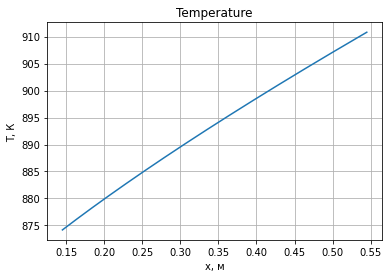

In [4]:
tochki = x[4394:16515]
davlen = T[4394:16515]
plt.title('Temperature')
plt.xlabel('x, м')
plt.ylabel('T, К')
plt.plot(np.array(tochki), np.array(davlen))
plt.grid(True)
plt.show()

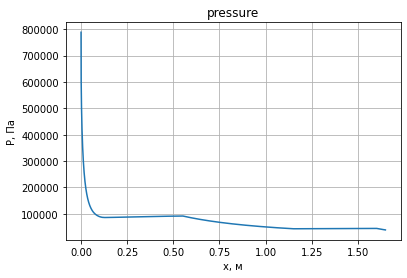

In [5]:
xnp = np.array(x)
plt.title('pressure')
plt.xlabel('x, м')
plt.ylabel('P, Па')
plt.plot(x[:49998], np.array(p[:49998]))
plt.grid(True)
plt.show()

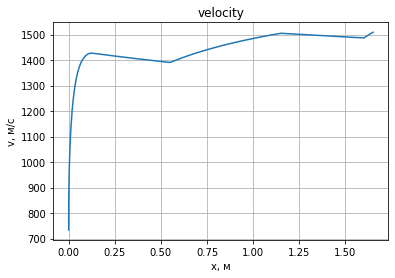

In [6]:
plt.title('velocity')
plt.xlabel('x, м')
plt.ylabel('v, м/с')
plt.plot(x[:49998], np.array(u[:49998]))
plt.grid(True)
plt.show()

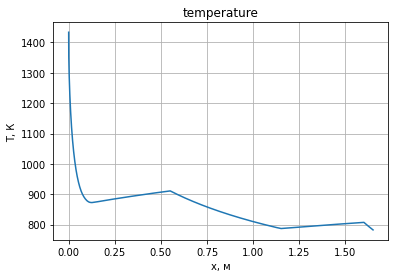

In [7]:
plt.title('temperature')
plt.plot(x[:49998], np.array(T[:49998]))
plt.xlabel('x, м')
plt.ylabel('T, К')
plt.grid(True)
plt.show()

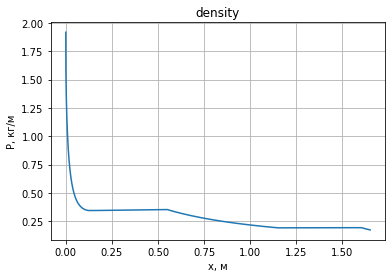

In [8]:
plt.title('density')
plt.plot(x[:49998], np.array(ro[:49998]))
plt.xlabel('x, м')
plt.ylabel('P, кг/м')
plt.grid(True)
plt.show()

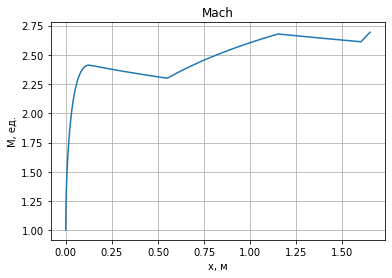

In [9]:
#th_M = []
#file = open("resm_th.txt")
#for line in file:
    #th_M.append(float(line))
#file.close()
#import matplotlib.pyplot as plt
plt.title('Mach')
plt.plot(x[:49998], np.array(M[:49998]))
#plt.plot(x[:49998], np.array(th_M[:49998]))
plt.xlabel('x, м')
plt.ylabel('M, ед.')
plt.grid(True)
plt.show()

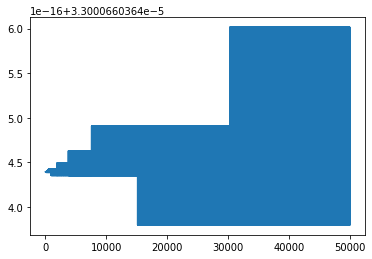

In [10]:
dx = []
for i in range(len(x) - 2):
    dx.append(x[i + 1] - x[i])
    
plt.plot(range(len(x) - 2), dx)
plt.show()

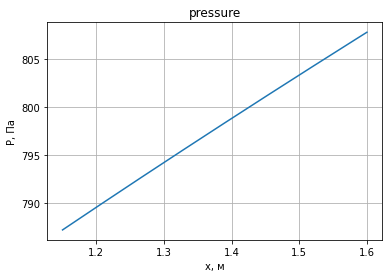

In [11]:
tochki = x[34849:48485]
davlen = T[34849:48485]
plt.title('pressure')
plt.xlabel('x, м')
plt.ylabel('P, Па')
plt.plot(np.array(tochki), np.array(davlen))
plt.grid(True)
plt.show()   

In [10]:
import numpy as np
m = np.zeros(100)

    
for k in range(len(m)):
    print(k)
    if (m[k]<=0) or (m[k]>2500):
        m=np.delete(m,[k])
        k-=1
        
print(m)        

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50


IndexError: index 50 is out of bounds for axis 0 with size 50